<a href="https://colab.research.google.com/github/Jhernandezh2/MetodosI_JulianaHernandez_MariaCamilaRamirez/blob/main/Parcial%201_final/Punto_7_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7.  Dado el conjunto de soporte:  Ω ={(0,sin(0),(π/3,sin(π/3))),(π/2,sin(π/2))}(a)  Dibuje el conjunto de soporte.
(b)  En la misma grafica, dibuje el polinomio interpolador y el conjunto de soporte en elintervalo [0,π/2].
(c)  Estime el valor desin(π/8) usando el polinomio interpolador.
(d)  Calcule el error en la estimaci ́on como:ε=|Xtrue−Xestimated|≈0.03552.
(e)  Compare el error anterior con el valor te ́orico.  Recuerde la formula general del errorde la interpolaci ́on:
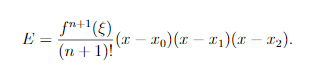
Son ambos resultados consistentes?


In [169]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.special as sp

omega = [(0,np.sin(0)),(np.pi/3,np.sin(np.pi/3)),(np.pi/2,np.sin(np.pi/2))]
xi = [0,np.pi/3, np.pi/2]
yi = np.sin(xi)

print (xi,yi)




[0, 1.0471975511965976, 1.5707963267948966] [0.        0.8660254 1.       ]


In [170]:
x = sym.Symbol('x',real=True)

def BaseLagrange(x,xi,i):
  L = 1
  for j in range(len(xi)):
    if i != j:
      L *= (x-xi[j])/(xi[i]-xi[j])
  return L

In [171]:
print(BaseLagrange(x,xi,2))

0.636619772367581*x*(1.90985931710274*x - 2.0)


In [152]:
def Interpolacion(x,xi,fi):
  sumatoria = 0
  for i in range(len(xi)):
    sumatoria += fi[i]*BaseLagrange(x,xi,i)
  return sumatoria

In [172]:
polinomio = Interpolacion(x,xi,yi)
print(polinomio)

0.826993343132688*x*(3.0 - 1.90985931710274*x) + 0.636619772367581*x*(1.90985931710274*x - 2.0)


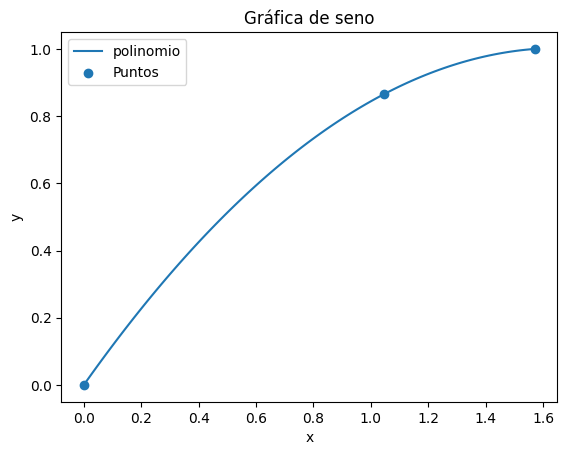

In [173]:
soporte = np.linspace(0,np.pi/2,100)
f = sym.lambdify(x,polinomio,'numpy')
plt.plot(soporte, f(soporte), label='polinomio')
plt.scatter(xi, yi, label='Puntos')
plt.title('Gráfica de seno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [174]:
xobj = np.pi/8
senoexp = f(xobj)
senoreal = np.sin(xobj)
print(senoexp)
print(senoreal)
Error = np.abs(senoreal - senoexp)
print("El error entre el valor real y el estimado es de ", Error)



0.41820893444312035
0.3826834323650898
El error entre el valor real y el estimado es de  0.03552550207803057


In [175]:
def funcion(x):
  return np.sin(x)

In [176]:
def derivadacentraln(f,x,h,n):
  if n == 0:
        return (f(x + h) - f(x - h)) / (2 * h)
  elif n == 1:
        return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)
  else:
        derivada = derivadacentraln(f, x, h, n - 1)
        derivada = (derivadacentraln(f, x + h, h, n - 1) - derivadacentraln(f, x - h, h, n - 1)) / (2 * h)
        return derivada

In [177]:
def multipli(x,xi):
    cons = 1
    for i in xi:
        if i != x:
            cons = cons*(x-i)
    return cons

In [178]:
print(multipli(x,xi))

x*(x - 1.5707963267949)*(x - 1.0471975511966)


In [179]:
def errorin(f,x, xi,n):
   h = xi[1]-xi[0]
   error = (derivadacentraln(f,x,h,n)/np.math.factorial(n+1))*multipli(x,xi)
   return error




In [180]:
print (errorin(f,np.pi/8,xi,2))
print ("El error teorico de interpolación es mucha más pequeño que el error relativo, el error de interpolación es de orden 17")

1.872613143315876e-17
El error teorico de interpolación es mucha más pequeño que el error relativo, el error de interpolación es de orden 17


<ipython-input-179-0508575a970a>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  error = (derivadacentraln(f,x,h,n)/np.math.factorial(n+1))*multipli(x,xi)
